The aim of this program is to understand the driving factors (or driver variables) behind loan default, 
i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 
Dataset loan.csv : historical data of all the customers who have applied for the loan, INCLUDING ANY CURRENT LOAN HOLDERS.


Highlighted below the process of how the diving factors are determined.

## 1. Reading the dataset 

In [530]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Reading the file : loan.csv is in same folder as python file
loan_dataframe = pd.read_csv('loan.csv')
print(" The current (rows and columns) in dataset are ", loan_dataframe.shape)

 The current (rows and columns) in dataset are  (39717, 111)


/var/folders/jl/2t3hvthd69g2m0q4m6v9vchh0000gn/T/ipykernel_58405/4168716884.py:9: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_dataframe = pd.read_csv('loan.csv')


## 2. Cleaning of data 

The checklist for the cleaning is followed.The observations were made by looking at file directly and for remaining applicable operations cleaning via code.
- Fix rows and columns
    * Incorrect rows 
    *  Summary rows 
    *  Extra rows
    *  Missing Column Names
    *  Inconsistent column names
    *  Unnecessary columns
    *  Columns containing Multiple data values 
    *  No Unique Identifier 
    *  Misaligned columns 


- Missing Values
  * Disguised Missing values
  * Significant number of Missing values in a row/column
  * Partial missing values

- Standardise Numbers
    * Non-standard units
    * Values with varying Scales 
    * Over-precision
    * Remove outliers
    
- Standardise Text
   * Extra characters
   * Different cases of same words
   * Non-standard formats
   
- Fix Invalid Values
  * Encoding Issues 
  * Incorrect data types
  * Correct values not in list
  * Wrong structure
  * Correct values beyond range
  * Validate internal rules
  
- Filter Data
    *  Duplicate data
    * Extra/Unnecessary  rows
    * Columns not relevant to analysis
    * Dispersed data
    























### Cleaning columns

In [531]:
#validating names of columns

list(loan_dataframe.columns.values)


['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

In [532]:
#checking for columns with null/empty values

loan_dataframe.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [533]:
#As some columns have many blank/null values, we remove the columns who have more 90% rows with values as null

missing_columns = loan_dataframe.columns[100*(loan_dataframe.isnull().sum()/len(loan_dataframe.index))>90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [534]:
#after checking that these are not the most relevant columns we remove these.

loan_dataframe_clean = loan_dataframe.drop(missing_columns,axis=1)
print(" The new dimension post the removal of columns in dataset is ", loan_dataframe_clean.shape)
100*(loan_dataframe_clean.isnull().sum()/len(loan_dataframe_clean.index))

 The new dimension post the removal of columns in dataset is  (39717, 55)


id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [535]:
#Remaining columns with high nulll values is 'desc' and mths_since_last_delinq 
#Assumption : all rows with null values in mths_since_last_delinq are to be replaced with zeros.

loan_dataframe_clean = loan_dataframe_clean.drop( ['desc'] , axis=1 )
print(" The new dimension post the descr of columns in dataset is ", loan_dataframe_clean.shape)
loan_dataframe_clean['mths_since_last_delinq'] = loan_dataframe_clean['mths_since_last_delinq'].fillna(0)
100*(loan_dataframe_clean.isnull().sum()/len(loan_dataframe_clean.index))

 The new dimension post the descr of columns in dataset is  (39717, 54)


id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

### Cleaning rows 

In [536]:
#checking for rows with null/empty values
loan_dataframe_clean.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
        ..
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [537]:
#checking for rows with null/empty values for more than 5 
loan_dataframe_clean[loan_dataframe_clean.isnull().sum(axis=1)>5]
print("No rows removal required")

No rows removal required


In [538]:
#checking the data types for the columns 
loan_dataframe_clean.info()
loan_dataframe_clean.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Correcting the data types of the columns comparing  each 20 columns (loan_dataframe_clean.iloc[:,0:20]) and the loan_dataframe_clean.def()

In [539]:


import re
loan_dataframe_clean['term'] = loan_dataframe_clean['term'].apply(lambda x:str(x).replace(' months',''))
loan_dataframe_clean['term'] = loan_dataframe_clean['term'].apply(lambda x:pd.to_numeric(x))
loan_dataframe_clean['int_rate']=loan_dataframe_clean['int_rate'].apply(lambda x:str(x))
loan_dataframe_clean['int_rate']=loan_dataframe_clean['int_rate'].apply(lambda x:pd.to_numeric(x.split('%')[0])/100)
loan_dataframe_clean['grade']=loan_dataframe_clean['grade'].apply(lambda x:str(x))
loan_dataframe_clean['sub_grade']=loan_dataframe_clean['sub_grade'].apply(lambda x:str(x))
loan_dataframe_clean['emp_title']=loan_dataframe_clean['grade'].apply(lambda x:str(x))
loan_dataframe_clean= loan_dataframe_clean[~loan_dataframe_clean['emp_length'].isnull()]  
loan_dataframe_clean['emp_length']=loan_dataframe_clean['emp_length'].apply(lambda x:re.findall('\d+',str(x))[0])
loan_dataframe_clean['emp_length']=loan_dataframe_clean['emp_length'].apply(lambda x:pd.to_numeric(x))
loan_dataframe_clean['home_ownership']=loan_dataframe_clean['home_ownership'].apply(lambda x:str(x))
loan_dataframe_clean['verification_status']=loan_dataframe_clean['home_ownership'].apply(lambda x:str(x))
loan_dataframe_clean['loan_status']=loan_dataframe_clean['loan_status'].apply(lambda x:str(x))
loan_dataframe_clean['purpose']=loan_dataframe_clean['purpose'].apply(lambda x:str(x))
loan_dataframe_clean['url']=loan_dataframe_clean['url'].apply(lambda x:str(x))
loan_dataframe_clean.iloc[:,0:20]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose
0,1077501,1296599,5000,5000,4975.0,36,0.1065,162.87,B,B2,B,10,RENT,24000.0,RENT,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card
1,1077430,1314167,2500,2500,2500.0,60,0.1527,59.83,C,C4,C,1,RENT,30000.0,RENT,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car
2,1077175,1313524,2400,2400,2400.0,36,0.1596,84.33,C,C5,C,10,RENT,12252.0,RENT,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business
3,1076863,1277178,10000,10000,10000.0,36,0.1349,339.31,C,C1,C,10,RENT,49200.0,RENT,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other
4,1075358,1311748,3000,3000,3000.0,60,0.1269,67.79,B,B5,B,1,RENT,80000.0,RENT,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,0.0807,78.42,A,A4,A,4,MORTGAGE,110000.0,MORTGAGE,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement
39713,90665,90607,8500,8500,875.0,36,0.1028,275.38,C,C1,C,3,RENT,18000.0,RENT,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card
39714,90395,90390,5000,5000,1325.0,36,0.0807,156.84,A,A4,A,1,MORTGAGE,100000.0,MORTGAGE,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation
39715,90376,89243,5000,5000,650.0,36,0.0743,155.38,A,A2,A,1,MORTGAGE,200000.0,MORTGAGE,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other


In [540]:

loan_dataframe_clean['title']=loan_dataframe_clean['title'].apply(lambda x:str(x))
loan_dataframe_clean['zip_code']=loan_dataframe_clean['zip_code'].apply(lambda x:str(x))
loan_dataframe_clean['addr_state']=loan_dataframe_clean['addr_state'].apply(lambda x:str(x))
loan_dataframe_clean= loan_dataframe_clean[~loan_dataframe_clean['revol_util'].isnull()]  
loan_dataframe_clean['revol_util']=loan_dataframe_clean['revol_util'].apply(lambda x:str(x).split('%')[0])
loan_dataframe_clean['revol_util']=loan_dataframe_clean['revol_util'].apply(lambda x:pd.to_numeric(x)/100)
loan_dataframe_clean['total_pymnt']=loan_dataframe_clean['total_pymnt'].round(2)
loan_dataframe_clean.iloc[:,20:40]

,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
0,Computer,860xx,AZ,27.65,0,Jan-85,1,0.0,3,0,13648,0.837,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16
1,bike,309xx,GA,1.00,0,Apr-99,5,0.0,3,0,1687,0.094,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17
2,real estate business,606xx,IL,8.72,0,Nov-01,2,0.0,2,0,2956,0.985,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67
3,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,0.210,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92
4,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,0.539,38,f,524.06,524.06,3513.33,3513.33,2475.94,1037.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.0,13,0,7274,0.131,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97
39713,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.0,6,0,8847,0.269,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49
39714,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.0,11,0,9698,0.194,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16
39715,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.0,17,0,85607,0.007,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20


In [541]:
loan_dataframe_clean['application_type']=loan_dataframe_clean['application_type'].apply(lambda x:str(x))
loan_dataframe_clean.iloc[:,40:59]
#The NaN values are not corrected for these as these indicate no data was available and cannot be defaulted to keep santity of the data.

,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,0.00,0.00,0.00,Jul-10,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,0.00,0.00,0.00,Jul-10,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,0.00,0.00,0.00,Apr-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,0.00,0.00,0.00,Jan-08,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


## 3. Analysis : Univariate and Bivariate

In [542]:
#Converting categorical variable to numerical variable 
#loan_status - we are assigning high weightage to the people who are fully paid we also want to see the data especially for current
#              no consideration for charged off.
loan_dataframe_clean['loan_status']=loan_dataframe_clean['loan_status'].apply(lambda x:2 if x=='Charged Off' else x)
loan_dataframe_clean['loan_status']=loan_dataframe_clean['loan_status'].apply(lambda x:0 if x=='Fully Paid' else x)
loan_dataframe_clean['loan_status']=loan_dataframe_clean['loan_status'].apply(lambda x:1 if x=='Current' else x)
loan_dataframe_clean['loan_status']=loan_dataframe_clean['loan_status'].apply(lambda x:pd.to_numeric(x))
loan_dataframe_clean['loan_status'].value_counts()

0    32113
2     5384
1     1098
Name: loan_status, dtype: int64

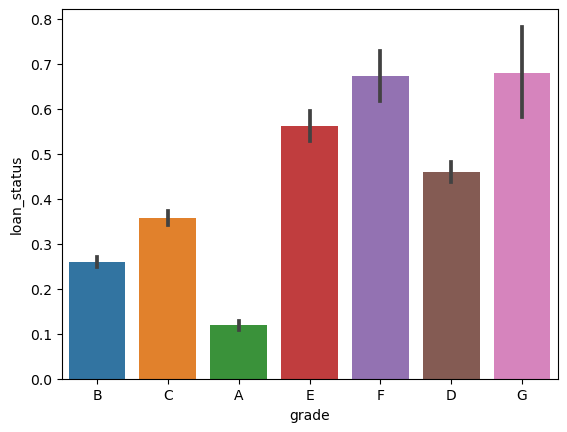

In [543]:
#Grade effect on loan_statuses
sns.barplot(x='grade',y='loan_status',data=loan_dataframe_clean)
plt.show()


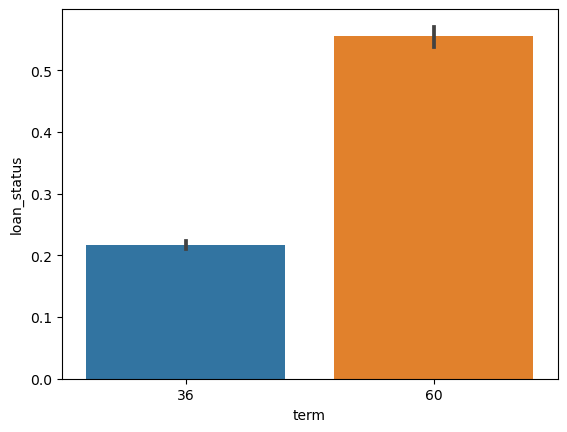

In [544]:
#Term effect on loan_statuses
sns.barplot(x='term',y='loan_status',data=loan_dataframe_clean)
plt.show()

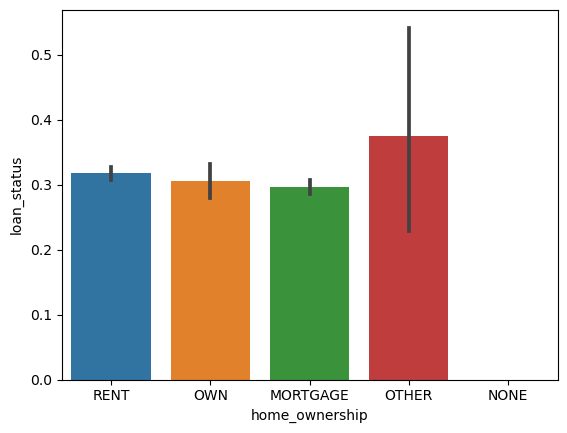

In [545]:
#Home ownership effect on loan_statuses
sns.barplot(x='home_ownership',y='loan_status',data=loan_dataframe_clean)
plt.show()

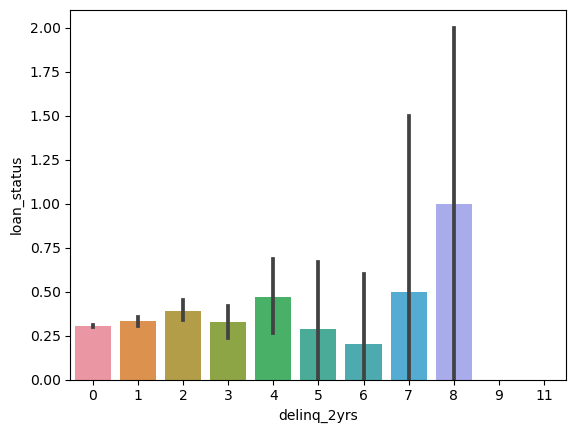

In [546]:
sns.barplot(x='delinq_2yrs',y='loan_status',data=loan_dataframe_clean)
plt.show()

In [547]:
#compare with loan amount

def fun(n):
    if n<3000:
        return 'low'
    elif n>3000 and n<10000:
        return 'medium'
    elif n>=10000 and n<20000:
        return 'high'
    elif n>=20000:
        return 'very high'



In [548]:
loan_dataframe_clean['loan_amnt']=loan_dataframe_clean['loan_amnt'].apply(lambda x:fun(x))


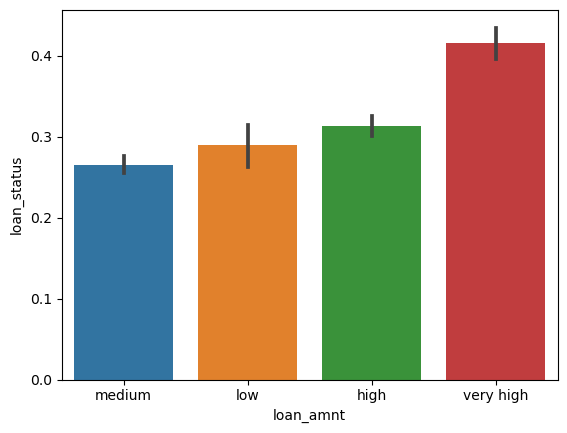

In [550]:
sns.barplot(x='loan_amnt',y='loan_status',data=loan_dataframe_clean)
plt.show()

## Observation :
There are more chances of defaulting if the intrest rate is high, loan_amnt is high and term is 60 months or more.The probability is also influenced by delinq_2years( dues in past). The 60 lakhs is outlier for annual income, once removed - we can see that the annual income in ranges of 20-40 lankhs is highly likely to be a defaulter.
